In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from skutil.feature_selection import MulticollinearityFilterer
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = None

/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
df_na = pd.read_csv('HME020030N.csv', parse_dates=[0], index_col=0)

In [4]:
df_na.head()

,dehumidifier 50 pint_ara,dehumidifier 50 pint_trend,dehumidifier_ara,dehumidifier_trend,dehumidifiers for home_ara,dehumidifiers for home_trend,dehumidifier 30 pint_ara,dehumidifier 30 pint_trend,dehumidifiers_ara,dehumidifiers_trend,30 pint dehumidifier_ara,30 pint dehumidifier_trend,air purifier_ara,air purifier_trend,dehumidifiers for basements_ara,dehumidifiers for basements_trend,dehumidifier 70 pint_ara,dehumidifier 70 pint_trend,dehumidifier for bathroom_ara,dehumidifier for bathroom_trend,small dehumidifier_ara,small dehumidifier_trend,50 pint dehumidifier_ara,50 pint dehumidifier_trend,dehumidifier small_ara,dehumidifier small_trend,dehumidifier with drain hose_ara,dehumidifier with drain hose_trend,70 pint dehumidifier_ara,70 pint dehumidifier_trend,closet dehumidifier_ara,closet dehumidifier_trend,safe dehumidifier_ara,safe dehumidifier_trend,dehumidifier air purifier_ara,dehumidifier air purifier_trend,dehumidifier for basements_ara,dehumidifier for basements_trend,bathroom dehumidifier_ara,bathroom dehumidifier_trend,basement dehumidifier_ara,basement dehumidifier_trend,whole house dehumidifier_ara,whole house dehumidifier_trend,portable dehumidifier_ara,portable dehumidifier_trend,dehumidifier for rv_ara,dehumidifier for rv_trend,dehumidifier hose_ara,dehumidifier hose_trend,inventory_fbm,inventory_fba,phase_Sustain_SoldOut,phase_Sustain,AVGSalePrice,Holiday_Christmas Day,Holiday_Columbus Day,Holiday_Independence Day,Holiday_Labor Day,Holiday_Martin Luther King Jr. Day,Holiday_Memorial Day,Holiday_New Year Day,Holiday_Presidents Day (Washingtons Birthday),Holiday_Thanksgiving Day,Holiday_Veterans Day,dehumidifier 50 pint,dehumidifier,dehumidifiers for home,dehumidifier 30 pint,dehumidifiers,30 pint dehumidifier,air purifier,dehumidifiers for basements,dehumidifier 70 pint,dehumidifier for bathroom,small dehumidifier,compact dehumidifier,energy efficient dehumidifier,50 pint dehumidifier,dehumidifier small,dehumidifier with drain hose,home dehumidifier,70 pint dehumidifier,dehumidifier for safe,closet dehumidifier,dehumidifier for home,dehumidifiers with pump,energy star dehumidifier,safe dehumidifier,dehumidifier air purifier,small dehumidifiers for rv,mid size dehumidifier,room dehumidifier,room dehumidifiers for home,small dehumidifiers,dehumidifier for basements,bathroom dehumidifier,dehumidifier 30 pt,dehumidifier for bedroom,dehumidifier for basement,30 pint dehumidifiers,basement dehumidifier,basement dehumidifiers for home,whole house dehumidifier,portable dehumidifier,small room dehumidifier,dehumidifier auto shut off,dehumidifier for rv,dehumidifier with hose,dehumidifier with hose drain,crawl space dehumidifier,dehumidifier hose,dehumidifier energy star,small dehumidifier for bathroom,dehumidifier 70,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,target
2017-07-11,14790.0,29.0,389.5,56.625,8462.0,33.875,80363.0,48.0,8392.0,52.125,123508.0,49.625,-268.0,51.0,1177.0,15.375,24108.5,44.375,54927.5,25.375,86582.0,55.75,122069.5,29.0,303608.5,60.625,114815.5,17.625,31603.5,37.875,80672.5,22.0,47186.0,26.875,170428.0,81.25,21663.0,17.875,163749.0,23.125,146125.0,41.875,298290.0,60.25,212112.0,18.125,371757.0,49.375,-47796.5,38.875,0.410084,0.033696,0.0,0.0,144.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,4.0,1.875439,0.497087,0.212062,0.559223,8.00000,0.141454,0.523622,7.0,5.0,0.578732,0.038697,0.300813,0.692464,0.039014,0.030675,0.579055,0.228571,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.962578,0.165975,0.02686,0.111801,0.484472,0.645435,2.0,1.966527,12.0,0.019272,1.119048,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,19.00000,0.220159,0.185676,0.596306,0.328,0.190476,0.093085,0.379679,2017,7,28,11,1,192,0,0,0,0,0,0,45.0
2017-07-12,14790.0,29.0,389.5,56.625,8462.0,33.875,80363.0,48.0,8392.0,52.125,123508.0,49.625,-268.0,51.0,1177.0,15.375,24108.5,44.375,54927.5,25.375,86582.0,55.75,122069.5,29.0,303608.5,6

In [5]:
df = df_na.dropna()
df.index.name = 'date'
df.head()

,dehumidifier 50 pint_ara,dehumidifier 50 pint_trend,dehumidifier_ara,dehumidifier_trend,dehumidifiers for home_ara,dehumidifiers for home_trend,dehumidifier 30 pint_ara,dehumidifier 30 pint_trend,dehumidifiers_ara,dehumidifiers_trend,30 pint dehumidifier_ara,30 pint dehumidifier_trend,air purifier_ara,air purifier_trend,dehumidifiers for basements_ara,dehumidifiers for basements_trend,dehumidifier 70 pint_ara,dehumidifier 70 pint_trend,dehumidifier for bathroom_ara,dehumidifier for bathroom_trend,small dehumidifier_ara,small dehumidifier_trend,50 pint dehumidifier_ara,50 pint dehumidifier_trend,dehumidifier small_ara,dehumidifier small_trend,dehumidifier with drain hose_ara,dehumidifier with drain hose_trend,70 pint dehumidifier_ara,70 pint dehumidifier_trend,closet dehumidifier_ara,closet dehumidifier_trend,safe dehumidifier_ara,safe dehumidifier_trend,dehumidifier air purifier_ara,dehumidifier air purifier_trend,dehumidifier for basements_ara,dehumidifier for basements_trend,bathroom dehumidifier_ara,bathroom dehumidifier_trend,basement dehumidifier_ara,basement dehumidifier_trend,whole house dehumidifier_ara,whole house dehumidifier_trend,portable dehumidifier_ara,portable dehumidifier_trend,dehumidifier for rv_ara,dehumidifier for rv_trend,dehumidifier hose_ara,dehumidifier hose_trend,inventory_fbm,inventory_fba,phase_Sustain_SoldOut,phase_Sustain,AVGSalePrice,Holiday_Christmas Day,Holiday_Columbus Day,Holiday_Independence Day,Holiday_Labor Day,Holiday_Martin Luther King Jr. Day,Holiday_Memorial Day,Holiday_New Year Day,Holiday_Presidents Day (Washingtons Birthday),Holiday_Thanksgiving Day,Holiday_Veterans Day,dehumidifier 50 pint,dehumidifier,dehumidifiers for home,dehumidifier 30 pint,dehumidifiers,30 pint dehumidifier,air purifier,dehumidifiers for basements,dehumidifier 70 pint,dehumidifier for bathroom,small dehumidifier,compact dehumidifier,energy efficient dehumidifier,50 pint dehumidifier,dehumidifier small,dehumidifier with drain hose,home dehumidifier,70 pint dehumidifier,dehumidifier for safe,closet dehumidifier,dehumidifier for home,dehumidifiers with pump,energy star dehumidifier,safe dehumidifier,dehumidifier air purifier,small dehumidifiers for rv,mid size dehumidifier,room dehumidifier,room dehumidifiers for home,small dehumidifiers,dehumidifier for basements,bathroom dehumidifier,dehumidifier 30 pt,dehumidifier for bedroom,dehumidifier for basement,30 pint dehumidifiers,basement dehumidifier,basement dehumidifiers for home,whole house dehumidifier,portable dehumidifier,small room dehumidifier,dehumidifier auto shut off,dehumidifier for rv,dehumidifier with hose,dehumidifier with hose drain,crawl space dehumidifier,dehumidifier hose,dehumidifier energy star,small dehumidifier for bathroom,dehumidifier 70,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,target
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-11,14790.0,29.0,389.5,56.625,8462.0,33.875,80363.0,48.0,8392.0,52.125,123508.0,49.625,-268.0,51.0,1177.0,15.375,24108.5,44.375,54927.5,25.375,86582.0,55.75,122069.5,29.0,303608.5,60.625,114815.5,17.625,31603.5,37.875,80672.5,22.0,47186.0,26.875,170428.0,81.25,21663.0,17.875,163749.0,23.125,146125.0,41.875,298290.0,60.25,212112.0,18.125,371757.0,49.375,-47796.5,38.875,0.410084,0.033696,0.0,0.0,144.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,4.0,1.875439,0.497087,0.212062,0.559223,8.00000,0.141454,0.523622,7.0,5.0,0.578732,0.038697,0.300813,0.692464,0.039014,0.030675,0.579055,0.228571,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.962578,0.165975,0.02686,0.111801,0.484472,0.645435,2.0,1.966527,12.0,0.019272,1.119048,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,19.00000,0.220159,0.185676,0.596306,0.328,0.190476,0.093085,0.379679,2017,7,28,11,1,192,0,0,0,0,0,0,45.0
2017-07-12,14790.0,29.0,389.5,56.625,8462.0,33.875,8036

In [6]:
df['Quarter'] = df['Month'].map(lambda x: (x - 1) // 3 + 1)

/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.head()

,dehumidifier 50 pint_ara,dehumidifier 50 pint_trend,dehumidifier_ara,dehumidifier_trend,dehumidifiers for home_ara,dehumidifiers for home_trend,dehumidifier 30 pint_ara,dehumidifier 30 pint_trend,dehumidifiers_ara,dehumidifiers_trend,30 pint dehumidifier_ara,30 pint dehumidifier_trend,air purifier_ara,air purifier_trend,dehumidifiers for basements_ara,dehumidifiers for basements_trend,dehumidifier 70 pint_ara,dehumidifier 70 pint_trend,dehumidifier for bathroom_ara,dehumidifier for bathroom_trend,small dehumidifier_ara,small dehumidifier_trend,50 pint dehumidifier_ara,50 pint dehumidifier_trend,dehumidifier small_ara,dehumidifier small_trend,dehumidifier with drain hose_ara,dehumidifier with drain hose_trend,70 pint dehumidifier_ara,70 pint dehumidifier_trend,closet dehumidifier_ara,closet dehumidifier_trend,safe dehumidifier_ara,safe dehumidifier_trend,dehumidifier air purifier_ara,dehumidifier air purifier_trend,dehumidifier for basements_ara,dehumidifier for basements_trend,bathroom dehumidifier_ara,bathroom dehumidifier_trend,basement dehumidifier_ara,basement dehumidifier_trend,whole house dehumidifier_ara,whole house dehumidifier_trend,portable dehumidifier_ara,portable dehumidifier_trend,dehumidifier for rv_ara,dehumidifier for rv_trend,dehumidifier hose_ara,dehumidifier hose_trend,inventory_fbm,inventory_fba,phase_Sustain_SoldOut,phase_Sustain,AVGSalePrice,Holiday_Christmas Day,Holiday_Columbus Day,Holiday_Independence Day,Holiday_Labor Day,Holiday_Martin Luther King Jr. Day,Holiday_Memorial Day,Holiday_New Year Day,Holiday_Presidents Day (Washingtons Birthday),Holiday_Thanksgiving Day,Holiday_Veterans Day,dehumidifier 50 pint,dehumidifier,dehumidifiers for home,dehumidifier 30 pint,dehumidifiers,30 pint dehumidifier,air purifier,dehumidifiers for basements,dehumidifier 70 pint,dehumidifier for bathroom,small dehumidifier,compact dehumidifier,energy efficient dehumidifier,50 pint dehumidifier,dehumidifier small,dehumidifier with drain hose,home dehumidifier,70 pint dehumidifier,dehumidifier for safe,closet dehumidifier,dehumidifier for home,dehumidifiers with pump,energy star dehumidifier,safe dehumidifier,dehumidifier air purifier,small dehumidifiers for rv,mid size dehumidifier,room dehumidifier,room dehumidifiers for home,small dehumidifiers,dehumidifier for basements,bathroom dehumidifier,dehumidifier 30 pt,dehumidifier for bedroom,dehumidifier for basement,30 pint dehumidifiers,basement dehumidifier,basement dehumidifiers for home,whole house dehumidifier,portable dehumidifier,small room dehumidifier,dehumidifier auto shut off,dehumidifier for rv,dehumidifier with hose,dehumidifier with hose drain,crawl space dehumidifier,dehumidifier hose,dehumidifier energy star,small dehumidifier for bathroom,dehumidifier 70,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,target,Quarter
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-11,14790.0,29.0,389.5,56.625,8462.0,33.875,80363.0,48.0,8392.0,52.125,123508.0,49.625,-268.0,51.0,1177.0,15.375,24108.5,44.375,54927.5,25.375,86582.0,55.75,122069.5,29.0,303608.5,60.625,114815.5,17.625,31603.5,37.875,80672.5,22.0,47186.0,26.875,170428.0,81.25,21663.0,17.875,163749.0,23.125,146125.0,41.875,298290.0,60.25,212112.0,18.125,371757.0,49.375,-47796.5,38.875,0.410084,0.033696,0.0,0.0,144.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,4.0,1.875439,0.497087,0.212062,0.559223,8.00000,0.141454,0.523622,7.0,5.0,0.578732,0.038697,0.300813,0.692464,0.039014,0.030675,0.579055,0.228571,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.962578,0.165975,0.02686,0.111801,0.484472,0.645435,2.0,1.966527,12.0,0.019272,1.119048,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,19.00000,0.220159,0.185676,0.596306,0.328,0.190476,0.093085,0.379679,2017,7,28,11,1,192,0,0,0,0,0,0,45.0,3
2017-07-12,14790.0,29.0,389.5,56.625,8462.0,

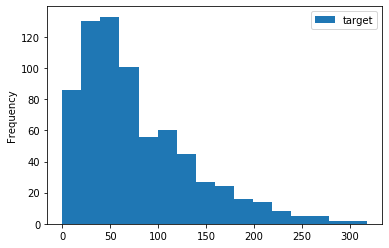

In [8]:
df.plot(y='target', kind='hist', bins=16)

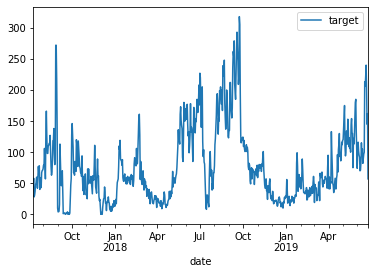

In [9]:
df.plot(y = 'target', use_index=True)

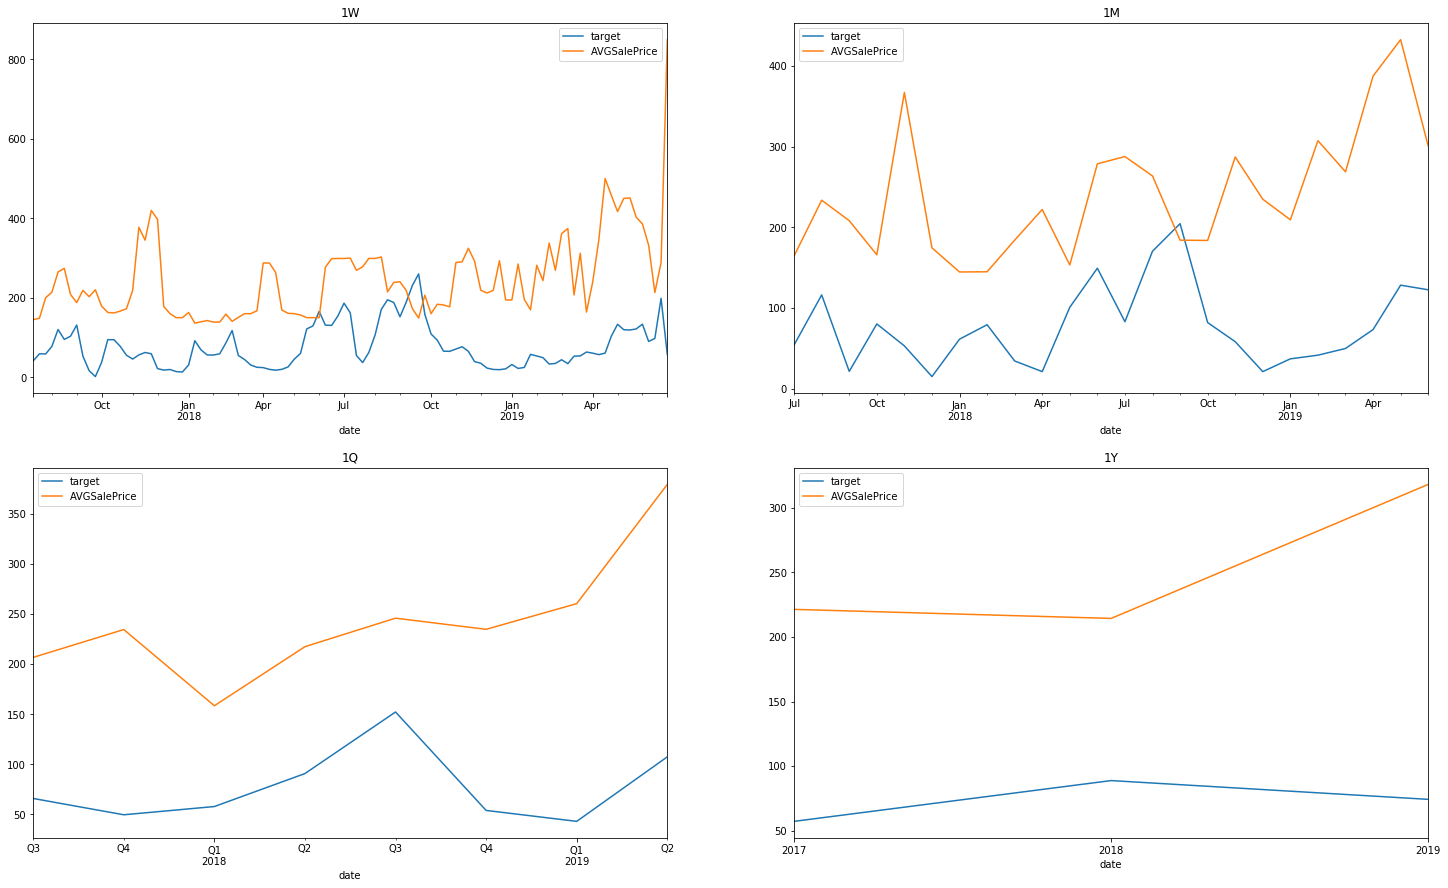

In [10]:
fig = plt.figure(figsize=(25, 15))

freqs = ['1W', '1M', '1Q', '1Y']
for i, freq in enumerate(freqs):
    ax = fig.add_subplot(len(freqs) / 2, len(freqs) / 2 , i+1)
    aggregation = df.reset_index()[['date', 'target', 'AVGSalePrice']].groupby(pd.Grouper(key='date', freq=freq)).mean()
    aggregation.plot(ax=ax)
    ax.title.set_text(freq)

In [10]:
df_trends = df.select(lambda col: col.endswith('trend'), axis=1)

for col in df_trends.columns:
    df_trends[col+'_rounded'] = np.around(df_trends[col], -1)
df_trends['target'] = df['target']    
df_trends.head()

/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.


,dehumidifier 50 pint_trend,dehumidifier_trend,dehumidifiers for home_trend,dehumidifier 30 pint_trend,dehumidifiers_trend,30 pint dehumidifier_trend,dehumidifiers for basements_trend,dehumidifier 70 pint_trend,small dehumidifier_trend,air humidifier_trend,50 pint dehumidifier_trend,dehumidifier with drain hose_trend,70 pint dehumidifier_trend,closet dehumidifier_trend,safe dehumidifier_trend,dehumidifier air purifier_trend,dehumidifier for basements_trend,basement dehumidifier_trend,whole house dehumidifier_trend,portable dehumidifier_trend,dehumidifier for rv_trend,dehumidifier hose_trend,dehumidifier drain hose_trend,dehumidifier pump_trend,dehumidifier 50 pint_trend_rounded,dehumidifier_trend_rounded,dehumidifiers for home_trend_rounded,dehumidifier 30 pint_trend_rounded,dehumidifiers_trend_rounded,30 pint dehumidifier_trend_rounded,dehumidifiers for basements_trend_rounded,dehumidifier 70 pint_trend_rounded,small dehumidifier_trend_rounded,air humidifier_trend_rounded,50 pint dehumidifier_trend_rounded,dehumidifier with drain hose_trend_rounded,70 pint dehumidifier_trend_rounded,closet dehumidifier_trend_rounded,safe dehumidifier_trend_rounded,dehumidifier air purifier_trend_rounded,dehumidifier for basements_trend_rounded,basement dehumidifier_trend_rounded,whole house dehumidifier_trend_rounded,portable dehumidifier_trend_rounded,dehumidifier for rv_trend_rounded,dehumidifier hose_trend_rounded,dehumidifier drain hose_trend_rounded,dehumidifier pump_trend_rounded,target
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-06,29.0,56.625,33.875,48.0,52.125,49.625,15.375,44.375,55.75,28.375,29.0,17.625,37.875,22.0,26.875,81.25,17.875,41.875,60.25,18.125,49.375,38.875,26.75,51.625,30.0,60.0,30.0,50.0,50.0,50.0,20.0,40.0,60.0,30.0,30.0,20.0,40.0,20.0,30.0,80.0,20.0,40.0,60.0,20.0,50.0,40.0,30.0,50.0,1.0
2017-03-07,29.0,56.625,33.875,48.0,52.125,49.625,15.375,44.375,55.75,28.375,29.0,17.625,37.875,22.0,26.875,81.25,17.875,41.875,60.25,18.125,49.375,38.875,26.75,51.625,30.0,60.0,30.0,50.0,50.0,50.0,20.0,40.0,60.0,30.0,30.0,20.0,40.0,20.0,30.0,80.0,20.0,40.0,60.0,20.0,50.0,40.0,30.0,50.0,0.0
2017-03-08,29.0,56.625,33.875,48.0,52.125,49.625,15.375,44.375,55.75,28.375,29.0,17.625,37.875,22.0,26.875,81.25,17.875,41.875,60.25,18.125,49.375,38.875,26.75,51.625,30.0,60.0,30.0,50.0,50.0,50.0,20.0,40.0,60.0,30.0,30.0,20.0,40.0,20.0,30.0,80.0,20.0,40.0,60.0,20.0,50.0,40.0,30.0,50.0,0.0
2017-03-09,29.0,56.625,33.875,48.0,52.125,49.625,15.375,44.375,55.75,28.375,29.0,17.625,37.875,22.0,26.875,81.25,17.875,41.875,60.25,18.125,49.375,38.875,26.75,51.625,30.0,60.0,30.0,50.0,50.0,50.0,20.0,40.0,60.0,30.0,30.0,20.0,40.0,20.0,30.0,80.0,20.0,40.0,60.0,20.0,50.0,40.0,30.0,50.0,0.0
2017-03-10,29.0,56.625,33.875,48.0,52.125,49.625,15.375,44.375,55.75,28.375,29.0,17.625,37.875,22.0,26.875,81.25,17.875,41.875,60.25,18.125,49.375,38.875,26.75,51.625,30.0,60.0,30.0,50.0,50.0,50.0,20.0,40.0,60.0,30.0,30.0,20.0,40.0,20.0,30.0,80.0,20.0,40.0,60.0,20.0,50.0,40.0,30.0,50.0,1.0


Text(0.5, 0.98, 'Dependency of target on Google Trends score')

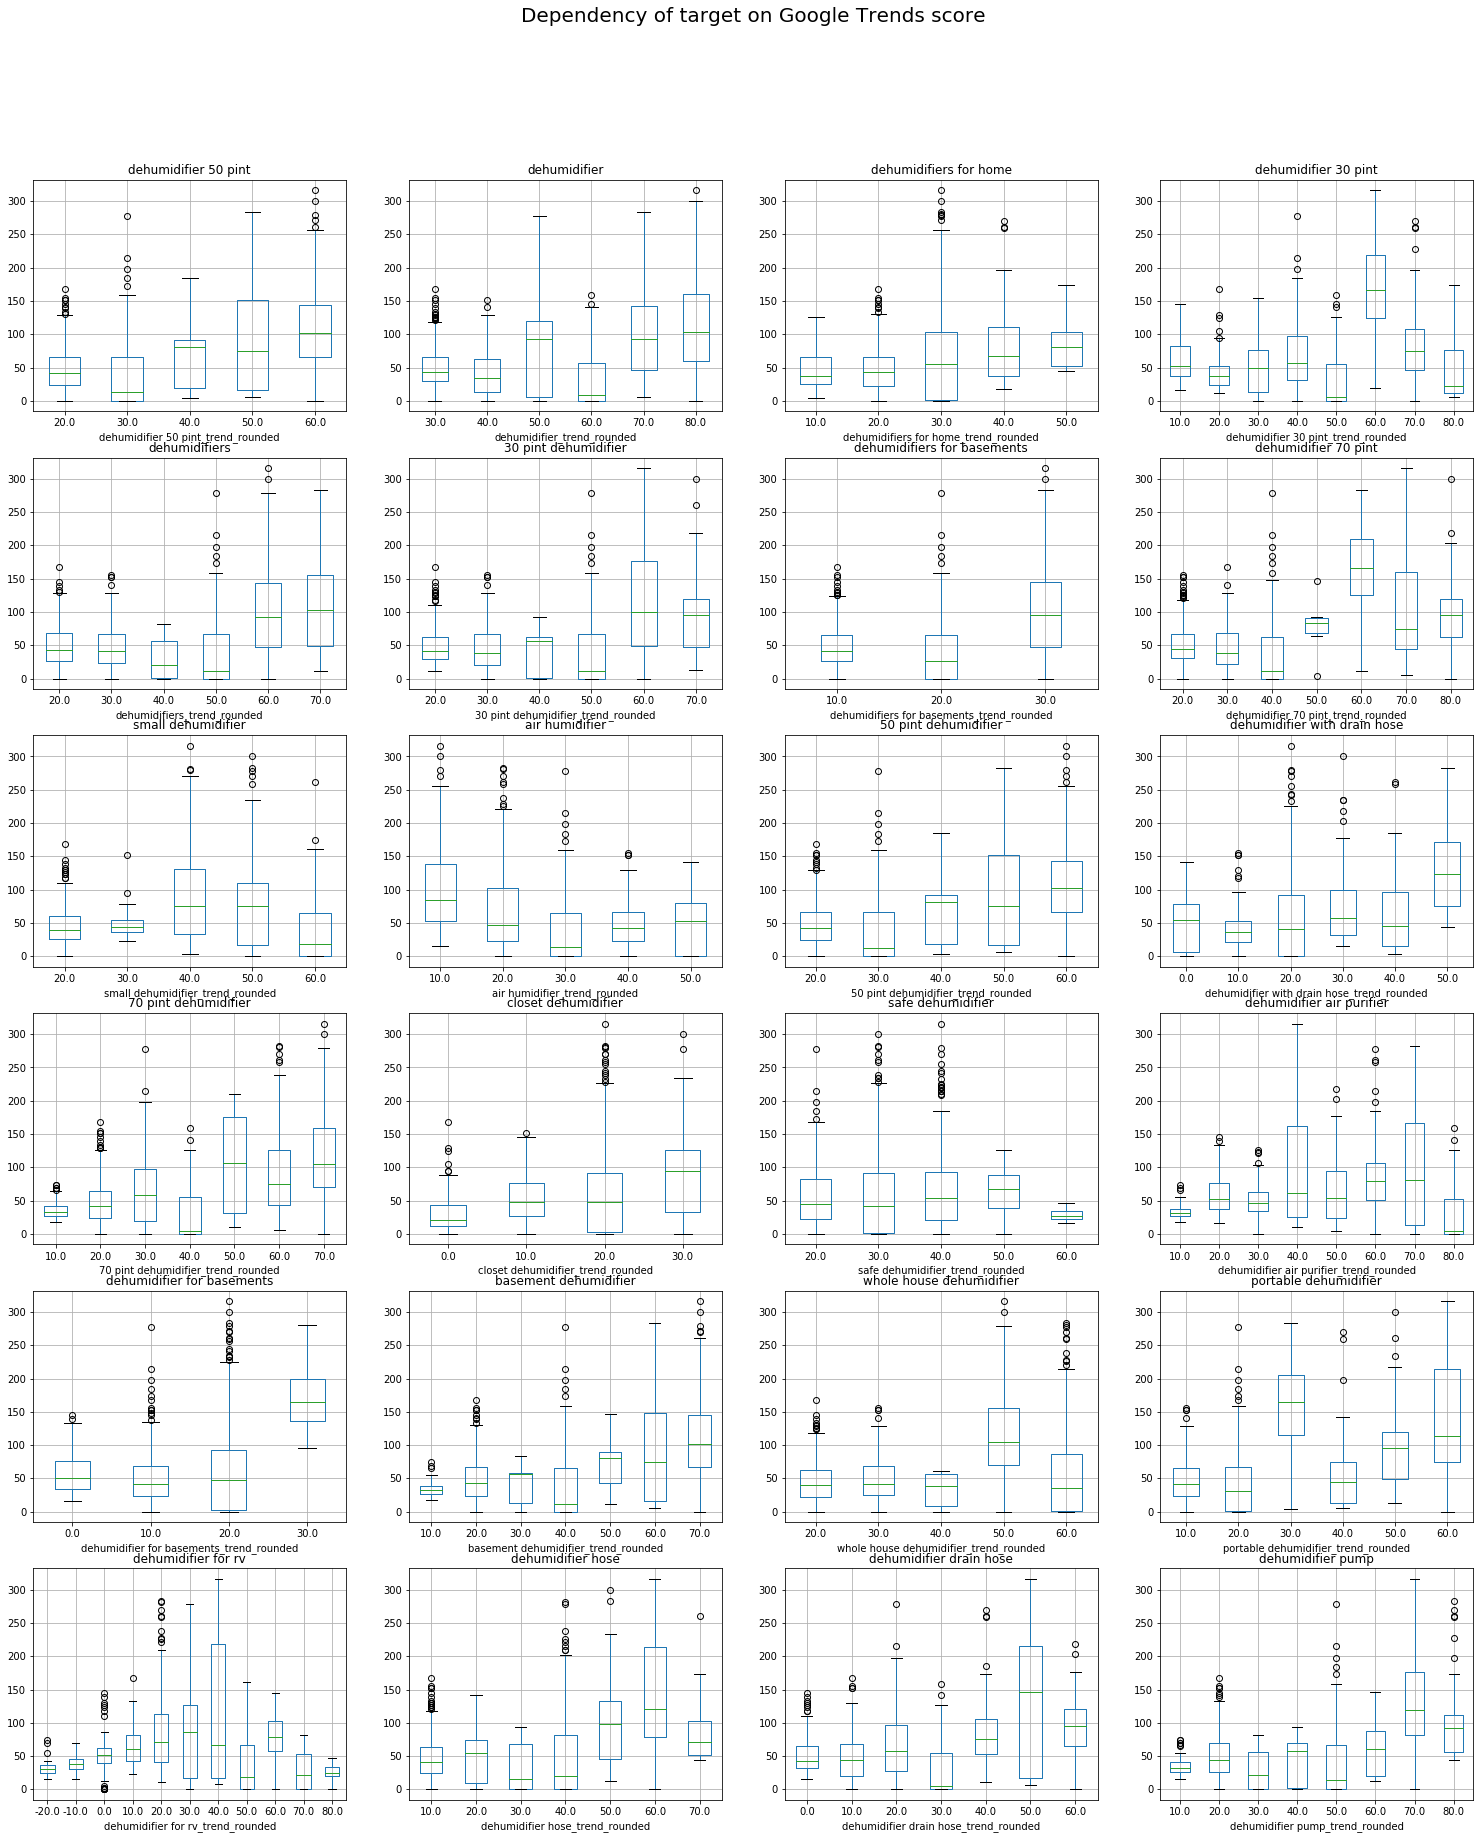

In [11]:
fig = plt.figure(figsize=(25, 30))
h, w = 6, 4

for i, tag in enumerate(df_trends.columns[:24]):    
    ax = fig.add_subplot(h, w , i + 1)
    df_trends.boxplot(column='target', by=tag+'_rounded', ax=ax)
    ax.title.set_text(tag.split('_')[0])
fig.suptitle("Dependency of target on Google Trends score", fontsize=20)

In [12]:
def round_into_groups(x, minimum, maximum, n):
    delta = (maximum- minimum) / n
    k = (x - minimum) // delta
    return round(minimum + delta * (0.5 + k), 0)

df_ara = df.select(lambda col: col.endswith('ara'), axis=1)

for col in df_ara.columns:
    minn, maxx = df_ara[col].min(), df_ara[col].max()
    df_ara[col+'_rounded'] = df_ara[col].map(lambda x: round_into_groups(x, minn, maxx, 5))
df_ara['target'] = df['target']    
df_ara.head()

/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


,dehumidifier 50 pint_ara,dehumidifier_ara,dehumidifiers for home_ara,dehumidifier 30 pint_ara,dehumidifiers_ara,30 pint dehumidifier_ara,dehumidifiers for basements_ara,dehumidifier 70 pint_ara,small dehumidifier_ara,air humidifier_ara,50 pint dehumidifier_ara,dehumidifier with drain hose_ara,70 pint dehumidifier_ara,closet dehumidifier_ara,safe dehumidifier_ara,dehumidifier air purifier_ara,dehumidifier for basements_ara,basement dehumidifier_ara,whole house dehumidifier_ara,portable dehumidifier_ara,dehumidifier for rv_ara,dehumidifier hose_ara,dehumidifier drain hose_ara,dehumidifier pump_ara,dehumidifier 50 pint_ara_rounded,dehumidifier_ara_rounded,dehumidifiers for home_ara_rounded,dehumidifier 30 pint_ara_rounded,dehumidifiers_ara_rounded,30 pint dehumidifier_ara_rounded,dehumidifiers for basements_ara_rounded,dehumidifier 70 pint_ara_rounded,small dehumidifier_ara_rounded,air humidifier_ara_rounded,50 pint dehumidifier_ara_rounded,dehumidifier with drain hose_ara_rounded,70 pint dehumidifier_ara_rounded,closet dehumidifier_ara_rounded,safe dehumidifier_ara_rounded,dehumidifier air purifier_ara_rounded,dehumidifier for basements_ara_rounded,basement dehumidifier_ara_rounded,whole house dehumidifier_ara_rounded,portable dehumidifier_ara_rounded,dehumidifier for rv_ara_rounded,dehumidifier hose_ara_rounded,dehumidifier drain hose_ara_rounded,dehumidifier pump_ara_rounded,target
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-06,14790.0,389.5,8462.0,80363.0,8392.0,123508.0,1177.0,24108.5,86582.0,14937.0,122069.5,114815.5,31603.5,80672.5,47186.0,170428.0,21663.0,146125.0,298290.0,212112.0,371757.0,-47796.5,49039.0,-32989.0,70816.0,377.0,7063.0,117190.0,12830.0,129009.0,2610.0,41767.0,91022.0,15665.0,117939.0,107710.0,49929.0,136153.0,51196.0,208308.0,51237.0,145109.0,344423.0,212225.0,398396.0,-1674.0,78617.0,23460.0,1.0
2017-03-07,14790.0,389.5,8462.0,80363.0,8392.0,123508.0,1177.0,24108.5,86582.0,14937.0,122069.5,114815.5,31603.5,80672.5,47186.0,170428.0,21663.0,146125.0,298290.0,212112.0,371757.0,-47796.5,49039.0,-32989.0,70816.0,377.0,7063.0,117190.0,12830.0,129009.0,2610.0,41767.0,91022.0,15665.0,117939.0,107710.0,49929.0,136153.0,51196.0,208308.0,51237.0,145109.0,344423.0,212225.0,398396.0,-1674.0,78617.0,23460.0,0.0
2017-03-08,14790.0,389.5,8462.0,80363.0,8392.0,123508.0,1177.0,24108.5,86582.0,14937.0,122069.5,114815.5,31603.5,80672.5,47186.0,170428.0,21663.0,146125.0,298290.0,212112.0,371757.0,-47796.5,49039.0,-32989.0,70816.0,377.0,7063.0,117190.0,12830.0,129009.0,2610.0,41767.0,91022.0,15665.0,117939.0,107710.0,49929.0,136153.0,51196.0,208308.0,51237.0,145109.0,344423.0,212225.0,398396.0,-1674.0,78617.0,23460.0,0.0
2017-03-09,14790.0,389.5,8462.0,80363.0,8392.0,123508.0,1177.0,24108.5,86582.0,14937.0,122069.5,114815.5,31603.5,80672.5,47186.0,170428.0,21663.0,146125.0,298290.0,212112.0,371757.0,-47796.5,49039.0,-32989.0,70816.0,377.0,7063.0,117190.0,12830.0,129009.0,2610.0,41767.0,91022.0,15665.0,117939.0,107710.0,49929.0,136153.0,51196.0,208308.0,51237.0,145109.0,344423.0,212225.0,398396.0,-1674.0,78617.0,23460.0,0.0
2017-03-10,14790.0,389.5,8462.0,80363.0,8392.0,123508.0,1177.0,24108.5,86582.0,14937.0,122069.5,114815.5,31603.5,80672.5,47186.0,170428.0,21663.0,146125.0,298290.0,212112.0,371757.0,-47796.5,49039.0,-32989.0,70816.0,377.0,7063.0,117190.0,12830.0,129009.0,2610.0,41767.0,91022.0,15665.0,117939.0,107710.0,49929.0,136153.0,51196.0,208308.0,51237.0,145109.0,344423.0,212225.0,398396.0,-1674.0,78617.0,23460.0,1.0


Text(0.5, 0.98, 'Dependency of target on ARA score')

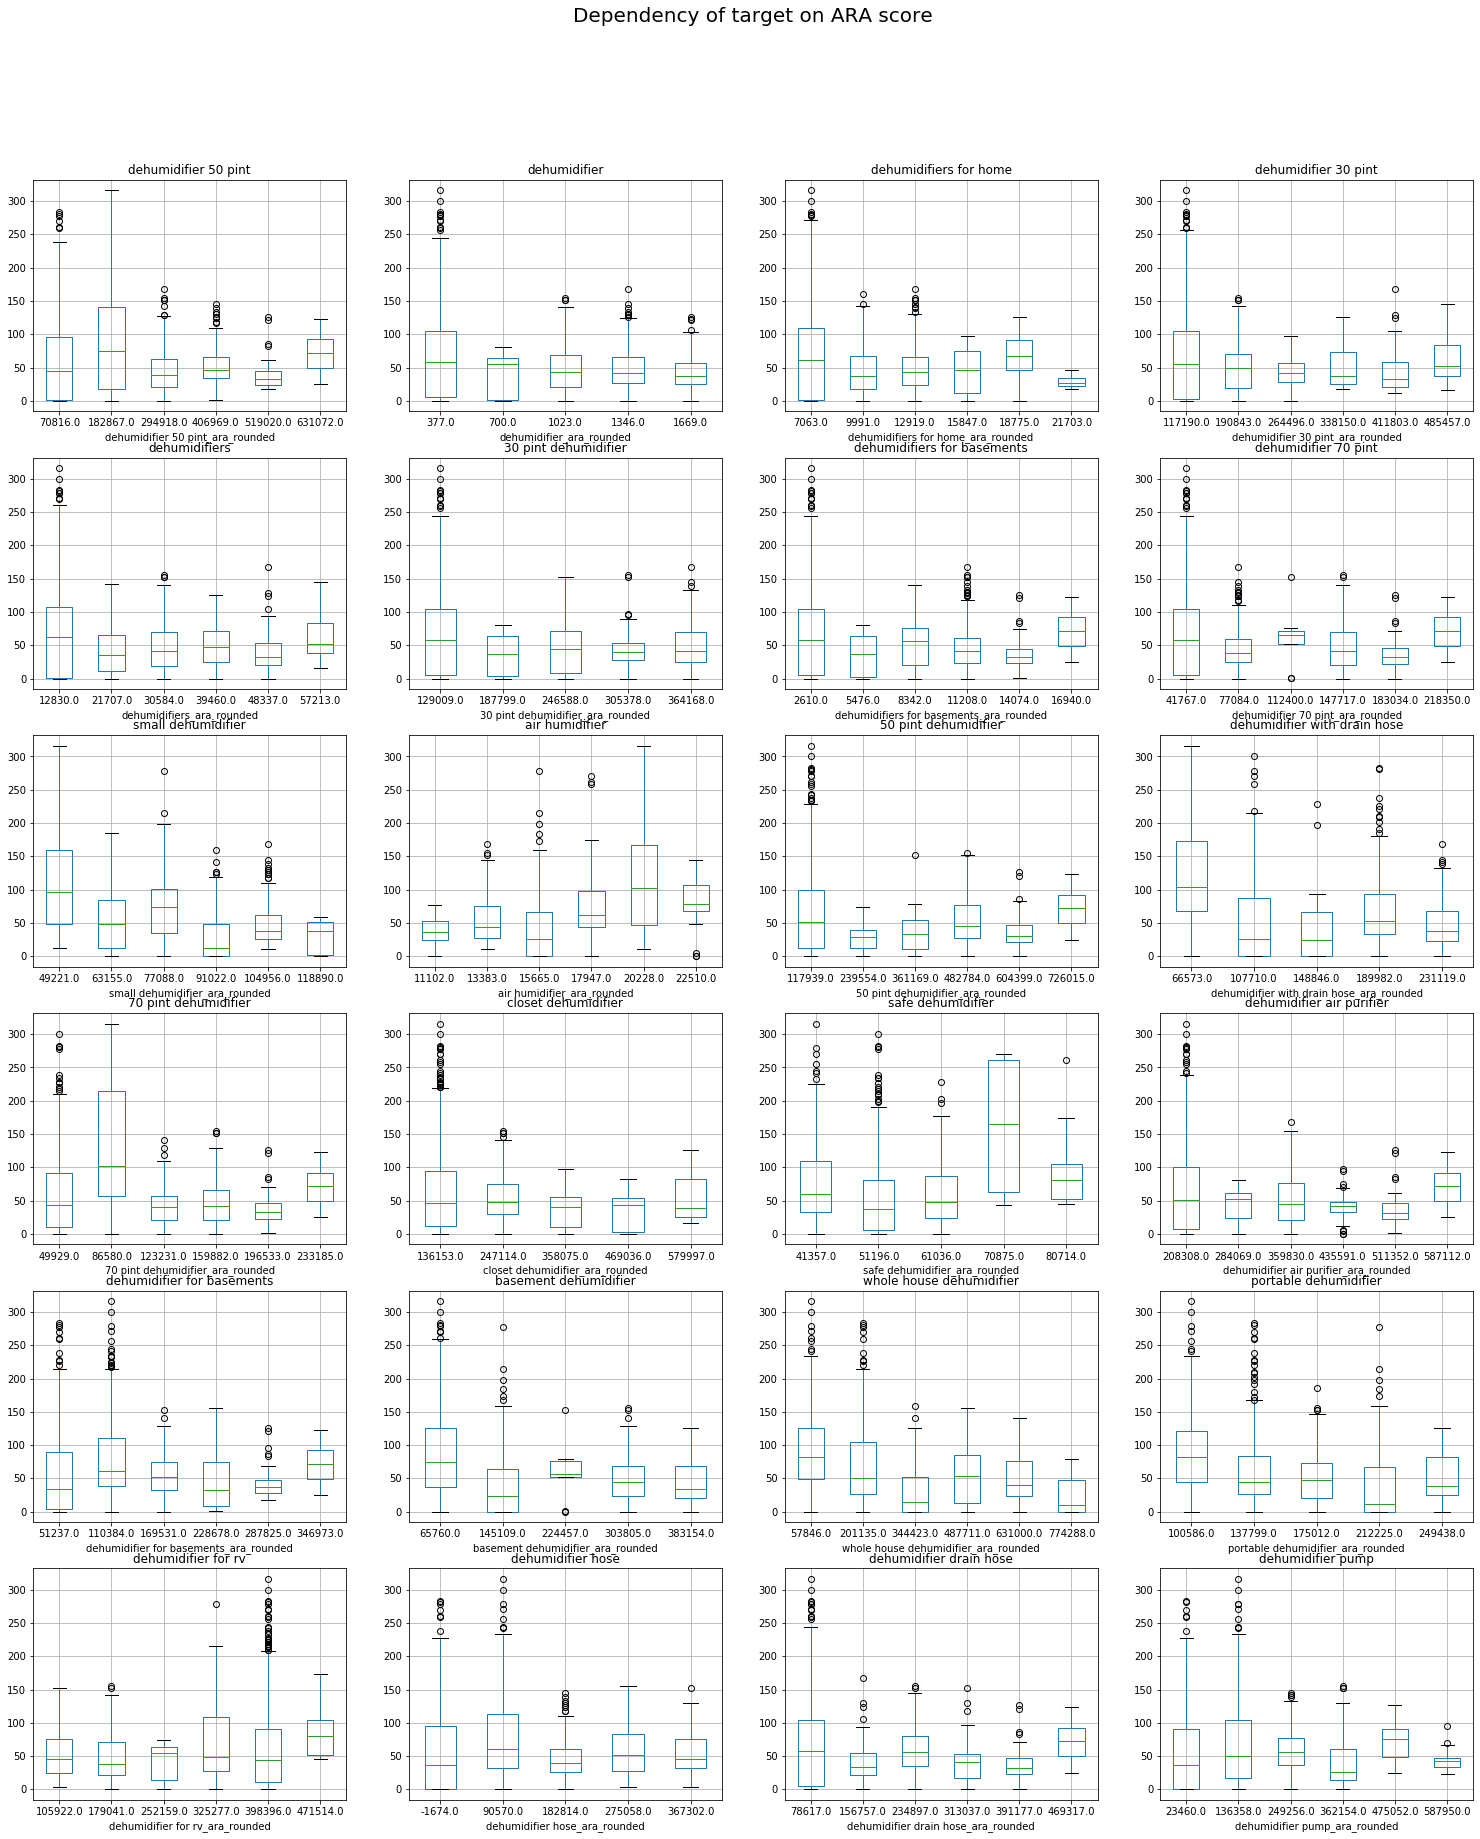

In [13]:
fig = plt.figure(figsize=(25, 30))
h, w = 6, 4

for i, tag in enumerate(df_ara.columns[:24]):    
    ax = fig.add_subplot(h, w , i + 1)
    df_ara.boxplot(column='target', by=tag+'_rounded', ax=ax)
    ax.title.set_text(tag.split('_')[0])
fig.suptitle("Dependency of target on ARA score", fontsize=20)

In [14]:
list(df.columns).index('dehumidifier pump')

112

In [15]:
df_tags = df[df.columns[63:113]]

In [16]:
df_tags.head()

,dehumidifier 50 pint,dehumidifier,dehumidifiers for home,dehumidifier 30 pint,dehumidifiers,30 pint dehumidifier,dehumidifiers for basements,dehumidifier 70 pint,small dehumidifier,air humidifier,energy efficient dehumidifier,50 pint dehumidifier,dehumidifier with drain hose,home dehumidifier,70 pint dehumidifier,dehumidifiers for basements 70 pint,closet dehumidifier,dehumidifier for home,dehumidifiers with pump,energy star dehumidifier,safe dehumidifier,dehumidifier air purifier,mid size dehumidifier,room dehumidifier,room dehumidifiers for home,small dehumidifiers,dehumidifier for basements,70 pint dehumidifiers for basements,dehumidifier for basement,50 pint dehumidifiers for basements,large room dehumidifier,basement dehumidifier,basement dehumidifiers for home,whole house dehumidifier,portable dehumidifier,small room dehumidifier,dehumidifier auto shut off,air conditioner dehumidifier,dehumidifier for rv,dehumidifier with hose,dehumidifier with hose drain,ac dehumidifier,crawl space dehumidifier,dehumidifier hose,dehumidifier energy star,small dehumidifier for bathroom,dehumidifier 70,dehumidifier drain hose,quiet dehumidifier,dehumidifier pump
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-06,32.0,1.155203,1.875439,0.497087,0.212062,0.559223,0.141454,0.523622,0.552632,1.146341,0.038697,0.300813,0.039014,0.030675,0.579055,0.425051,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.165975,0.02686,0.111801,0.484472,0.645435,0.4,0.019272,0.855011,0.377682,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,1.711735,2.44591,0.220159,0.185676,1.25,0.596306,0.328,0.190476,0.093085,0.379679,0.518617,0.160858,0.451872
2017-03-07,32.0,1.155203,1.875439,0.497087,0.212062,0.559223,0.141454,0.523622,0.552632,1.146341,0.038697,0.300813,0.039014,0.030675,0.579055,0.425051,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.165975,0.02686,0.111801,0.484472,0.645435,0.4,0.019272,0.855011,0.377682,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,1.711735,2.44591,0.220159,0.185676,1.25,0.596306,0.328,0.190476,0.093085,0.379679,0.518617,0.160858,0.451872
2017-03-08,32.0,1.155203,1.875439,0.497087,0.212062,0.559223,0.141454,0.523622,0.552632,1.146341,0.038697,0.300813,0.039014,0.030675,0.579055,0.425051,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.165975,0.02686,0.111801,0.484472,0.645435,0.4,0.019272,0.855011,0.377682,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,1.711735,2.44591,0.220159,0.185676,1.25,0.596306,0.328,0.190476,0.093085,0.379679,0.518617,0.160858,0.451872
2017-03-09,32.0,1.155203,1.875439,0.497087,0.212062,0.559223,0.141454,0.523622,0.552632,1.146341,0.038697,0.300813,0.039014,0.030675,0.579055,0.425051,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.165975,0.02686,0.111801,0.484472,0.645435,0.4,0.019272,0.855011,0.377682,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,1.711735,2.44591,0.220159,0.185676,1.25,0.596306,0.328,0.190476,0.093085,0.379679,0.518617,0.160858,0.451872
2017-03-10,32.0,1.155203,1.875439,0.497087,0.212062,0.559223,0.141454,0.523622,0.552632,1.146341,0.038697,0.300813,0.039014,0.030675,0.579055,0.425051,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.165975,0.02686,0.111801,0.484472,0.645435,0.4,0.019272,0.855011,0.377682,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,1.711735,2.44591,0.220159,0.185676,1.25,0.596306,0.328,0.190476,0.093085,0.379679,0.518617,0.160858,0.451872


In [17]:
for col in df_tags.columns:
    minn, maxx = df_tags[col].min(), df_tags[col].max()
    df_tags[col+'_rounded'] = df_tags[col].map(lambda x: round_into_groups(x, minn, maxx, 5))
df_tags['target'] = df['target']    
df_tags.head()

/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,dehumidifier 50 pint,dehumidifier,dehumidifiers for home,dehumidifier 30 pint,dehumidifiers,30 pint dehumidifier,dehumidifiers for basements,dehumidifier 70 pint,small dehumidifier,air humidifier,energy efficient dehumidifier,50 pint dehumidifier,dehumidifier with drain hose,home dehumidifier,70 pint dehumidifier,dehumidifiers for basements 70 pint,closet dehumidifier,dehumidifier for home,dehumidifiers with pump,energy star dehumidifier,safe dehumidifier,dehumidifier air purifier,mid size dehumidifier,room dehumidifier,room dehumidifiers for home,small dehumidifiers,dehumidifier for basements,70 pint dehumidifiers for basements,dehumidifier for basement,50 pint dehumidifiers for basements,large room dehumidifier,basement dehumidifier,basement dehumidifiers for home,whole house dehumidifier,portable dehumidifier,small room dehumidifier,dehumidifier auto shut off,air conditioner dehumidifier,dehumidifier for rv,dehumidifier with hose,dehumidifier with hose drain,ac dehumidifier,crawl space dehumidifier,dehumidifier hose,dehumidifier energy star,small dehumidifier for bathroom,dehumidifier 70,dehumidifier drain hose,quiet dehumidifier,dehumidifier pump,dehumidifier 50 pint_rounded,dehumidifier_rounded,dehumidifiers for home_rounded,dehumidifier 30 pint_rounded,dehumidifiers_rounded,30 pint dehumidifier_rounded,dehumidifiers for basements_rounded,dehumidifier 70 pint_rounded,small dehumidifier_rounded,air humidifier_rounded,energy efficient dehumidifier_rounded,50 pint dehumidifier_rounded,dehumidifier with drain hose_rounded,home dehumidifier_rounded,70 pint dehumidifier_rounded,dehumidifiers for basements 70 pint_rounded,closet dehumidifier_rounded,dehumidifier for home_rounded,dehumidifiers with pump_rounded,energy star dehumidifier_rounded,safe dehumidifier_rounded,dehumidifier air purifier_rounded,mid size dehumidifier_rounded,room dehumidifier_rounded,room dehumidifiers for home_rounded,small dehumidifiers_rounded,dehumidifier for basements_rounded,70 pint dehumidifiers for basements_rounded,dehumidifier for basement_rounded,50 pint dehumidifiers for basements_rounded,large room dehumidifier_rounded,basement dehumidifier_rounded,basement dehumidifiers for home_rounded,whole house dehumidifier_rounded,portable dehumidifier_rounded,small room dehumidifier_rounded,dehumidifier auto shut off_rounded,air conditioner dehumidifier_rounded,dehumidifier for rv_rounded,dehumidifier with hose_rounded,dehumidifier with hose drain_rounded,ac dehumidifier_rounded,crawl space dehumidifier_rounded,dehumidifier hose_rounded,dehumidifier energy star_rounded,small dehumidifier for bathroom_rounded,dehumidifier 70_rounded,dehumidifier drain hose_rounded,quiet dehumidifier_rounded,dehumidifier pump_rounded,target
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-06,32.0,1.155203,1.875439,0.497087,0.212062,0.559223,0.141454,0.523622,0.552632,1.146341,0.038697,0.300813,0.039014,0.030675,0.579055,0.425051,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.165975,0.02686,0.111801,0.484472,0.645435,0.4,0.019272,0.855011,0.377682,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,1.711735,2.44591,0.220159,0.185676,1.25,0.596306,0.328,0.190476,0.093085,0.379679,0.518617,0.160858,0.451872,34.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,2.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,3.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,1.0,2.0,4.0,5.0,5.0,0.0,0.0,4.0,5.0,2.0,0.0,1.0,1.0,3.0,1.0,2.0,1.0
2017-03-07,32.0,1.155203,1.875439,0.497087,0.212062,0.559223,0.141454,0.523622,0.552632,1.146341,0.038697,0.300813,0.039014,0.030675,0.579055,0.425051,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.165975,0.02686,0.111801,0.484472,0.645435,0.4,0.019272,0.855011,0.377682,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,1.711735,2.44591,0.220159,0.185676,1.25,0.596306,0.328,0.190476,0.093085,0.379679,0.518617,0.160858,0.451872,34.0,2.0,5.0,1.0,1.0,1.0,0.0,0.0,2.0,5.0,1.0,1.0,1.0,1.0,

Text(0.5, 0.98, 'Dependency of target on tag-position')

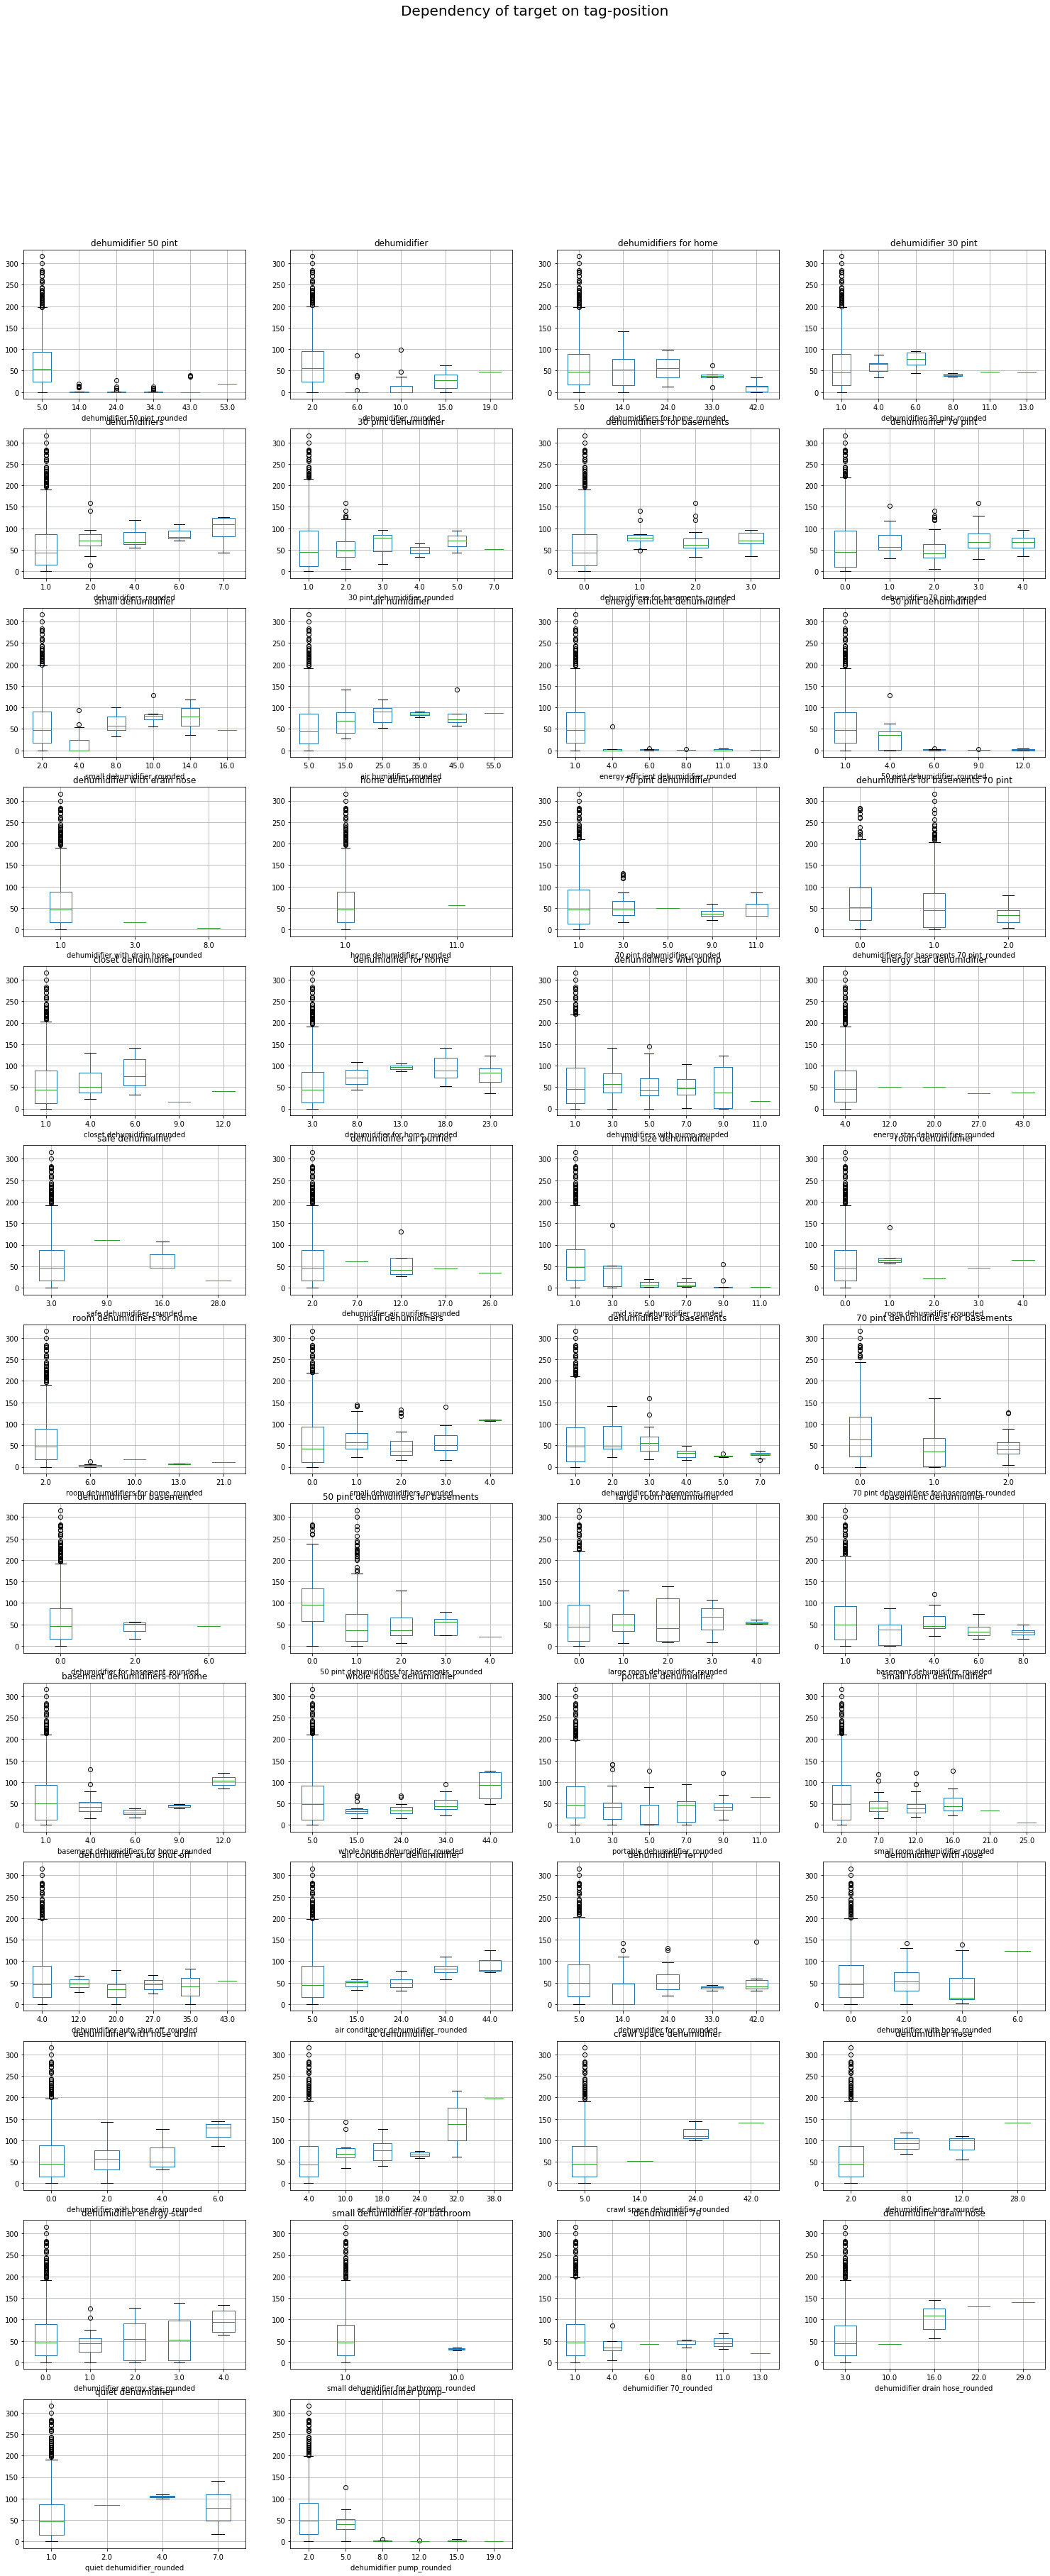

In [18]:
fig = plt.figure(figsize=(25, 60))
h, w = 13, 4

for i, tag in enumerate(df_tags.columns[:50]):    
    ax = fig.add_subplot(h, w , i + 1)
    df_tags.boxplot(column='target', by=tag+'_rounded', ax=ax)
    ax.title.set_text(tag.split('_')[0])
fig.suptitle("Dependency of target on tag-position", fontsize=20)

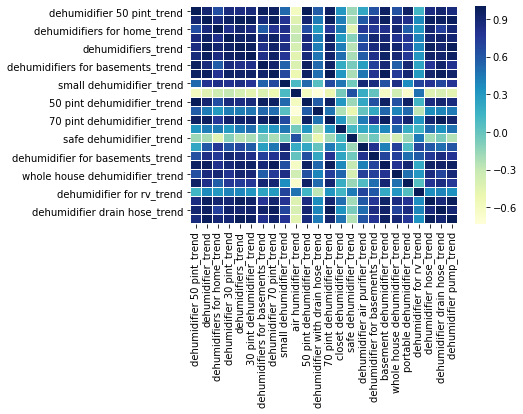

In [19]:
sns.heatmap(df_trends[df_trends.columns[:24]].corr(), cmap ="YlGnBu", linewidths = 0.1) 

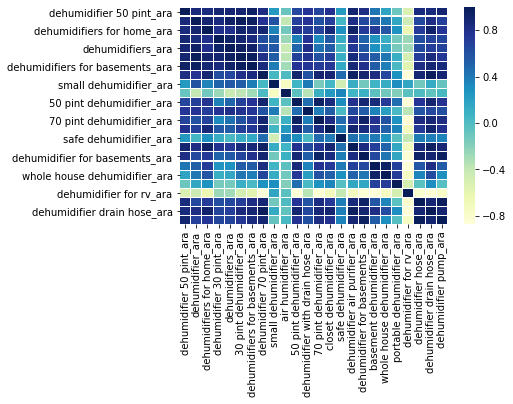

In [20]:
sns.heatmap(df_ara[df_ara.columns[:24]].corr(), cmap ="YlGnBu", linewidths = 0.1) 

Text(0.5, 0.98, 'Dependency of target on seasons')

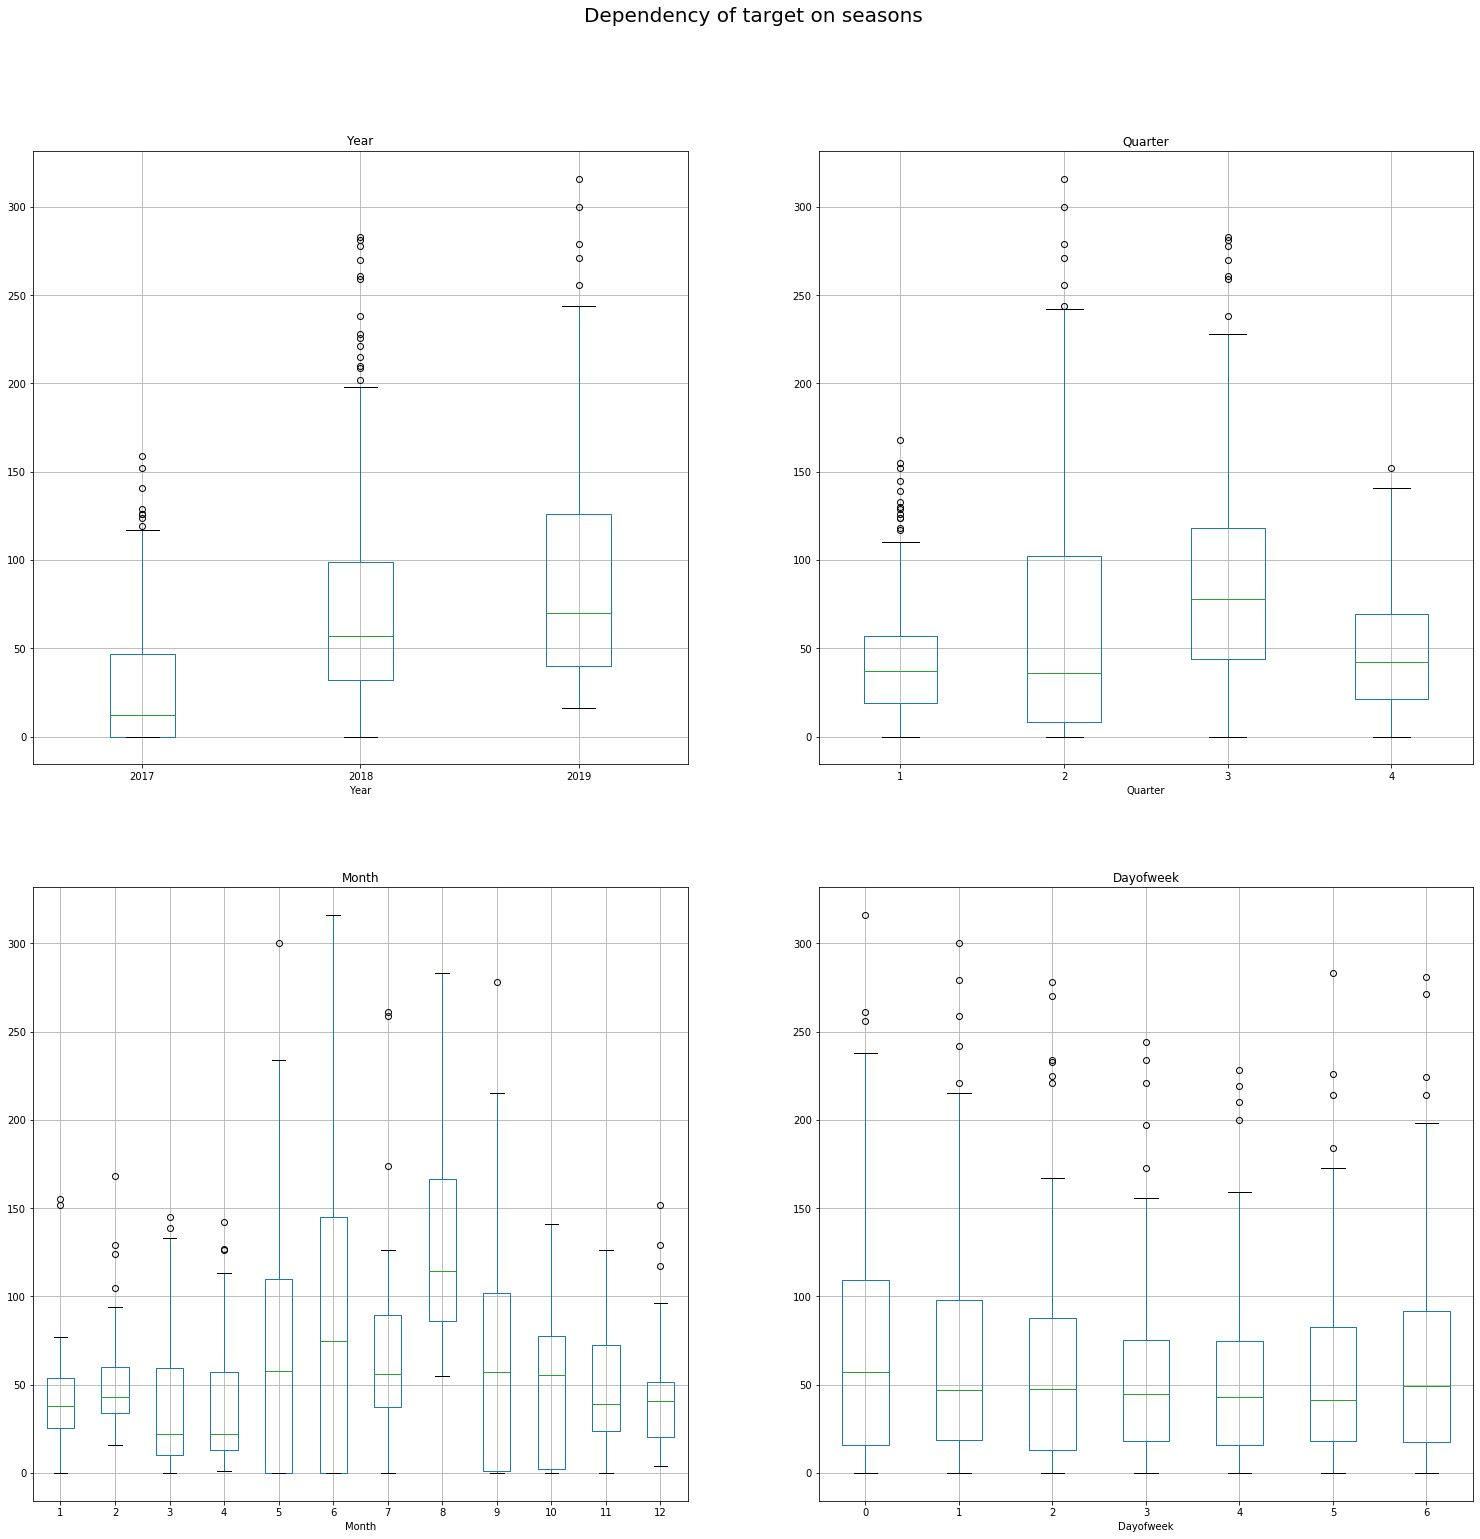

In [21]:
fig = plt.figure(figsize=(25, 25))

periods = ["Year", "Quarter", "Month", "Dayofweek"]

for i, period in enumerate(periods):
    ax = fig.add_subplot(2, 2 , i+1)
    df.boxplot(column='target', by=period, ax=ax)
    ax.title.set_text(period)
fig.suptitle("Dependency of target on seasons", fontsize=20)

In [22]:
df.head()

,dehumidifier 50 pint_ara,dehumidifier 50 pint_trend,dehumidifier_ara,dehumidifier_trend,dehumidifiers for home_ara,dehumidifiers for home_trend,dehumidifier 30 pint_ara,dehumidifier 30 pint_trend,dehumidifiers_ara,dehumidifiers_trend,30 pint dehumidifier_ara,30 pint dehumidifier_trend,dehumidifiers for basements_ara,dehumidifiers for basements_trend,dehumidifier 70 pint_ara,dehumidifier 70 pint_trend,small dehumidifier_ara,small dehumidifier_trend,air humidifier_ara,air humidifier_trend,50 pint dehumidifier_ara,50 pint dehumidifier_trend,dehumidifier with drain hose_ara,dehumidifier with drain hose_trend,70 pint dehumidifier_ara,70 pint dehumidifier_trend,closet dehumidifier_ara,closet dehumidifier_trend,safe dehumidifier_ara,safe dehumidifier_trend,dehumidifier air purifier_ara,dehumidifier air purifier_trend,dehumidifier for basements_ara,dehumidifier for basements_trend,basement dehumidifier_ara,basement dehumidifier_trend,whole house dehumidifier_ara,whole house dehumidifier_trend,portable dehumidifier_ara,portable dehumidifier_trend,dehumidifier for rv_ara,dehumidifier for rv_trend,dehumidifier hose_ara,dehumidifier hose_trend,dehumidifier drain hose_ara,dehumidifier drain hose_trend,dehumidifier pump_ara,dehumidifier pump_trend,inventory_fbm,inventory_fba,phase_Sustain_SoldOut,phase_Sustain,AVGSalePrice,Holiday_Christmas Day,Holiday_Columbus Day,Holiday_Independence Day,Holiday_Labor Day,Holiday_Martin Luther King Jr. Day,Holiday_Memorial Day,Holiday_New Year Day,Holiday_Presidents Day (Washingtons Birthday),Holiday_Thanksgiving Day,Holiday_Veterans Day,dehumidifier 50 pint,dehumidifier,dehumidifiers for home,dehumidifier 30 pint,dehumidifiers,30 pint dehumidifier,dehumidifiers for basements,dehumidifier 70 pint,small dehumidifier,air humidifier,energy efficient dehumidifier,50 pint dehumidifier,dehumidifier with drain hose,home dehumidifier,70 pint dehumidifier,dehumidifiers for basements 70 pint,closet dehumidifier,dehumidifier for home,dehumidifiers with pump,energy star dehumidifier,safe dehumidifier,dehumidifier air purifier,mid size dehumidifier,room dehumidifier,room dehumidifiers for home,small dehumidifiers,dehumidifier for basements,70 pint dehumidifiers for basements,dehumidifier for basement,50 pint dehumidifiers for basements,large room dehumidifier,basement dehumidifier,basement dehumidifiers for home,whole house dehumidifier,portable dehumidifier,small room dehumidifier,dehumidifier auto shut off,air conditioner dehumidifier,dehumidifier for rv,dehumidifier with hose,dehumidifier with hose drain,ac dehumidifier,crawl space dehumidifier,dehumidifier hose,dehumidifier energy star,small dehumidifier for bathroom,dehumidifier 70,dehumidifier drain hose,quiet dehumidifier,dehumidifier pump,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,target,Quarter
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-06,14790.0,29.0,389.5,56.625,8462.0,33.875,80363.0,48.0,8392.0,52.125,123508.0,49.625,1177.0,15.375,24108.5,44.375,86582.0,55.75,14937.0,28.375,122069.5,29.0,114815.5,17.625,31603.5,37.875,80672.5,22.0,47186.0,26.875,170428.0,81.25,21663.0,17.875,146125.0,41.875,298290.0,60.25,212112.0,18.125,371757.0,49.375,-47796.5,38.875,49039.0,26.75,-32989.0,51.625,0.500594,0.0,0.0,0.0,189.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.155203,1.875439,0.497087,0.212062,0.559223,0.141454,0.523622,0.552632,1.146341,0.038697,0.300813,0.039014,0.030675,0.579055,0.425051,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.165975,0.02686,0.111801,0.484472,0.645435,0.4,0.019272,0.855011,0.377682,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,1.711735,2.44591,0.220159,0.185676,1.25,0.596306,0.328,0.190476,0.093085,0.379679,0.518617,0.160858,0.451872,2017,3,10,6,0,65,0,0,0,0,0,0,1.0,1
2017-03-07,14790.0,29.0,389.5,56.625,8462.0,33.875,80363.0,48.0,8392

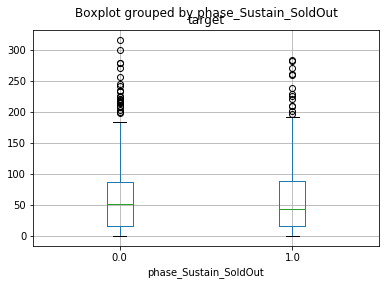

In [23]:
df.boxplot(column='target', by='phase_Sustain_SoldOut')

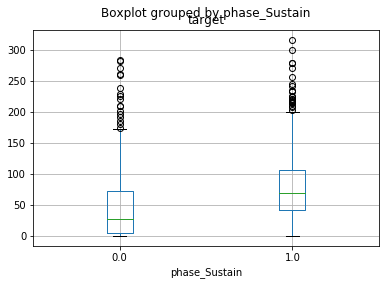

In [24]:
df.boxplot(column='target', by='phase_Sustain')

/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


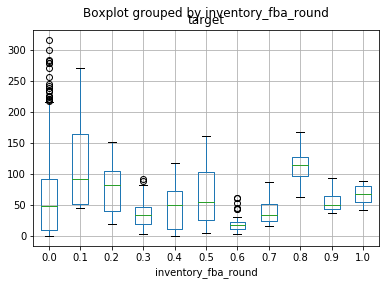

In [25]:
df['inventory_fba_round'] = np.round(df['inventory_fba'], 1)
df.boxplot(column='target', by='inventory_fba_round')

/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


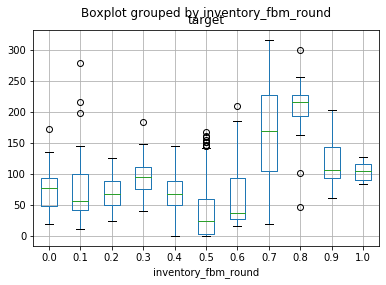

In [26]:
df['inventory_fbm_round'] = np.round(df['inventory_fbm'], 1)
df.boxplot(column='target', by='inventory_fbm_round')

In [27]:
fs = MulticollinearityFilterer()

In [28]:
drop = fs.fit(df[df.columns[:-1]])

In [29]:
len(drop.mean_abs_correlations_)

38

In [30]:
len(df.columns)

129

In [31]:
drop

MulticollinearityFilterer(as_df=True, cols=None, method='pearson',
                          threshold=0.85)

In [32]:
lr = LinearRegression()

In [34]:
lr.fit(np.arange(0, len(df.target)).reshape(-1, 1), df['target'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
x = np.arange(0, len(df.target))
y = x * lr.coef_[0] + lr.intercept_

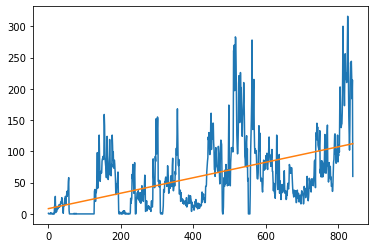

In [36]:
plt.plot(x, df.target)
plt.plot(x,  y)

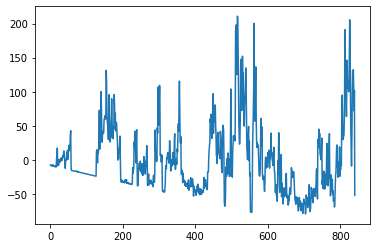

In [37]:
plt.plot(x, df.target - y)

In [38]:
df_monthly = df.reset_index()[['date', 'target', 'AVGSalePrice']].groupby(pd.Grouper(key='date', freq='1M')).mean()

In [39]:
df_monthly.head()

,target,AVGSalePrice
date,,
2017-03-31,3.653846,227.798117
2017-04-30,19.833333,204.687519
2017-05-31,2.129032,279.839015
2017-06-30,0.000000,289.791104
2017-07-31,40.645161,266.798169


In [40]:
lr_target_monthly = LinearRegression()
x = np.arange(0, len(df_monthly.target))
lr_target_monthly.fit(x.reshape(-1, 1), df_monthly.target)
y = lr_target_monthly.coef_[0] * x + lr_target_monthly.intercept_
df_monthly['target_detrend'] = df_monthly.target - y

lr_price_monthly = LinearRegression()
x = np.arange(0, len(df_monthly.AVGSalePrice))
lr_price_monthly.fit(x.reshape(-1, 1), df_monthly.AVGSalePrice)
y = lr_price_monthly.coef_[0] * x + lr_price_monthly.intercept_
df_monthly['price_detrend'] = df_monthly.AVGSalePrice - y

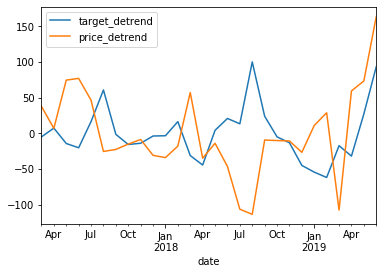

In [41]:
df_monthly[['target_detrend', 'price_detrend']].plot()

In [5]:
df.head()

,dehumidifier 50 pint_ara,dehumidifier 50 pint_trend,dehumidifier_ara,dehumidifier_trend,dehumidifiers for home_ara,dehumidifiers for home_trend,dehumidifier 30 pint_ara,dehumidifier 30 pint_trend,dehumidifiers_ara,dehumidifiers_trend,30 pint dehumidifier_ara,30 pint dehumidifier_trend,dehumidifiers for basements_ara,dehumidifiers for basements_trend,dehumidifier 70 pint_ara,dehumidifier 70 pint_trend,small dehumidifier_ara,small dehumidifier_trend,air humidifier_ara,air humidifier_trend,50 pint dehumidifier_ara,50 pint dehumidifier_trend,dehumidifier with drain hose_ara,dehumidifier with drain hose_trend,70 pint dehumidifier_ara,70 pint dehumidifier_trend,closet dehumidifier_ara,closet dehumidifier_trend,safe dehumidifier_ara,safe dehumidifier_trend,dehumidifier air purifier_ara,dehumidifier air purifier_trend,dehumidifier for basements_ara,dehumidifier for basements_trend,basement dehumidifier_ara,basement dehumidifier_trend,whole house dehumidifier_ara,whole house dehumidifier_trend,portable dehumidifier_ara,portable dehumidifier_trend,dehumidifier for rv_ara,dehumidifier for rv_trend,dehumidifier hose_ara,dehumidifier hose_trend,dehumidifier drain hose_ara,dehumidifier drain hose_trend,dehumidifier pump_ara,dehumidifier pump_trend,inventory_fbm,inventory_fba,phase_Sustain_SoldOut,phase_Sustain,AVGSalePrice,Holiday_Christmas Day,Holiday_Columbus Day,Holiday_Independence Day,Holiday_Labor Day,Holiday_Martin Luther King Jr. Day,Holiday_Memorial Day,Holiday_New Year Day,Holiday_Presidents Day (Washingtons Birthday),Holiday_Thanksgiving Day,Holiday_Veterans Day,dehumidifier 50 pint,dehumidifier,dehumidifiers for home,dehumidifier 30 pint,dehumidifiers,30 pint dehumidifier,dehumidifiers for basements,dehumidifier 70 pint,small dehumidifier,air humidifier,energy efficient dehumidifier,50 pint dehumidifier,dehumidifier with drain hose,home dehumidifier,70 pint dehumidifier,dehumidifiers for basements 70 pint,closet dehumidifier,dehumidifier for home,dehumidifiers with pump,energy star dehumidifier,safe dehumidifier,dehumidifier air purifier,mid size dehumidifier,room dehumidifier,room dehumidifiers for home,small dehumidifiers,dehumidifier for basements,70 pint dehumidifiers for basements,dehumidifier for basement,50 pint dehumidifiers for basements,large room dehumidifier,basement dehumidifier,basement dehumidifiers for home,whole house dehumidifier,portable dehumidifier,small room dehumidifier,dehumidifier auto shut off,air conditioner dehumidifier,dehumidifier for rv,dehumidifier with hose,dehumidifier with hose drain,ac dehumidifier,crawl space dehumidifier,dehumidifier hose,dehumidifier energy star,small dehumidifier for bathroom,dehumidifier 70,dehumidifier drain hose,quiet dehumidifier,dehumidifier pump,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,target
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-06,14790.0,29.0,389.5,56.625,8462.0,33.875,80363.0,48.0,8392.0,52.125,123508.0,49.625,1177.0,15.375,24108.5,44.375,86582.0,55.75,14937.0,28.375,122069.5,29.0,114815.5,17.625,31603.5,37.875,80672.5,22.0,47186.0,26.875,170428.0,81.25,21663.0,17.875,146125.0,41.875,298290.0,60.25,212112.0,18.125,371757.0,49.375,-47796.5,38.875,49039.0,26.75,-32989.0,51.625,0.500594,0.0,0.0,0.0,189.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1.155203,1.875439,0.497087,0.212062,0.559223,0.141454,0.523622,0.552632,1.146341,0.038697,0.300813,0.039014,0.030675,0.579055,0.425051,0.582305,1.084536,1.443299,0.440083,0.169072,0.202899,0.165975,0.02686,0.111801,0.484472,0.645435,0.4,0.019272,0.855011,0.377682,0.916484,0.951435,4.153846,0.362222,2.452328,2.027088,1.711735,2.44591,0.220159,0.185676,1.25,0.596306,0.328,0.190476,0.093085,0.379679,0.518617,0.160858,0.451872,2017,3,10,6,0,65,0,0,0,0,0,0,1.0
2017-03-07,14790.0,29.0,389.5,56.625,8462.0,33.875,80363.0,48.0,8392.0,52.125,1

In [11]:
df_tags = df_tags.reset_index()
freqs = ['1W', '1M', '1Q', '1Y']
for freq in freqs:
    df_tags.fillna(df_tags.groupby(pd.Grouper(key='date', freq=freq)).transform('mean'), inplace=True)   
df_tags.set_index('date', inplace=True)

In [13]:
df.loc[:, 63:113] = df_tags

/home/viniavskyi/anaconda3/envs/dl/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
df.head()

,dehumidifier 50 pint_ara,dehumidifier 50 pint_trend,dehumidifier_ara,dehumidifier_trend,dehumidifiers for home_ara,dehumidifiers for home_trend,dehumidifier 30 pint_ara,dehumidifier 30 pint_trend,dehumidifiers_ara,dehumidifiers_trend,30 pint dehumidifier_ara,30 pint dehumidifier_trend,dehumidifiers for basements_ara,dehumidifiers for basements_trend,dehumidifier 70 pint_ara,dehumidifier 70 pint_trend,small dehumidifier_ara,small dehumidifier_trend,air humidifier_ara,air humidifier_trend,50 pint dehumidifier_ara,50 pint dehumidifier_trend,dehumidifier with drain hose_ara,dehumidifier with drain hose_trend,70 pint dehumidifier_ara,70 pint dehumidifier_trend,closet dehumidifier_ara,closet dehumidifier_trend,safe dehumidifier_ara,safe dehumidifier_trend,dehumidifier air purifier_ara,dehumidifier air purifier_trend,dehumidifier for basements_ara,dehumidifier for basements_trend,basement dehumidifier_ara,basement dehumidifier_trend,whole house dehumidifier_ara,whole house dehumidifier_trend,portable dehumidifier_ara,portable dehumidifier_trend,dehumidifier for rv_ara,dehumidifier for rv_trend,dehumidifier hose_ara,dehumidifier hose_trend,dehumidifier drain hose_ara,dehumidifier drain hose_trend,dehumidifier pump_ara,dehumidifier pump_trend,inventory_fbm,inventory_fba,phase_Sustain_SoldOut,phase_Sustain,AVGSalePrice,Holiday_Christmas Day,Holiday_Columbus Day,Holiday_Independence Day,Holiday_Labor Day,Holiday_Martin Luther King Jr. Day,Holiday_Memorial Day,Holiday_New Year Day,Holiday_Presidents Day (Washingtons Birthday),Holiday_Thanksgiving Day,Holiday_Veterans Day,dehumidifier 50 pint,dehumidifier,dehumidifiers for home,dehumidifier 30 pint,dehumidifiers,30 pint dehumidifier,dehumidifiers for basements,dehumidifier 70 pint,small dehumidifier,air humidifier,energy efficient dehumidifier,50 pint dehumidifier,dehumidifier with drain hose,home dehumidifier,70 pint dehumidifier,dehumidifiers for basements 70 pint,closet dehumidifier,dehumidifier for home,dehumidifiers with pump,energy star dehumidifier,safe dehumidifier,dehumidifier air purifier,mid size dehumidifier,room dehumidifier,room dehumidifiers for home,small dehumidifiers,dehumidifier for basements,70 pint dehumidifiers for basements,dehumidifier for basement,50 pint dehumidifiers for basements,large room dehumidifier,basement dehumidifier,basement dehumidifiers for home,whole house dehumidifier,portable dehumidifier,small room dehumidifier,dehumidifier auto shut off,air conditioner dehumidifier,dehumidifier for rv,dehumidifier with hose,dehumidifier with hose drain,ac dehumidifier,crawl space dehumidifier,dehumidifier hose,dehumidifier energy star,small dehumidifier for bathroom,dehumidifier 70,dehumidifier drain hose,quiet dehumidifier,dehumidifier pump,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,target
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-06,14790.0,29.0,389.5,56.625,8462.0,33.875,80363.0,48.0,8392.0,52.125,123508.0,49.625,1177.0,15.375,24108.5,44.375,86582.0,55.75,14937.0,28.375,122069.5,29.0,114815.5,17.625,31603.5,37.875,80672.5,22.0,47186.0,26.875,170428.0,81.25,21663.0,17.875,146125.0,41.875,298290.0,60.25,212112.0,18.125,371757.0,49.375,-47796.5,38.875,49039.0,26.75,-32989.0,51.625,0.500594,0.0,0.0,0.0,189.990000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,3.75,43.0,23.316328,25.833816,24.304776,26.380068,23.613331,29.094203,43.531993,45.950906,47.090942,48.721152,50.0,46.329559,40.705892,48.543478,43.687681,42.126449,49.354167,49.786594,44.35779,42.800362,50.0,44.53288,48.434783,26.476667,42.561594,49.296786,4.337674,46.918954,43.055888,50.0,46.966033,43.37974,47.392663,15.613451,43.895566,33.230374,45.302264,46.226087,28.989192,47.619565,50.0,45.302264,46.778986,46.640851,45.518478,49.517029,47.405435,2017,3,10,6,0,65,0,0,0,0,0,0,1.0
2017-03-07,14790.0,29.0,389.5,56.625,8462.0,33.875

In [15]:
df.to_csv('data.csv')